# PREDICTION OF GRADUATE ADMISSIONS FROM AN INDIAN PERSPECTIVE.
## Table of Contents
* [Introduction](#Chapter_1_Introduction)
    * [Objectives](#Objecives)
* [Import necessary libraries and data](#chapter-2-import-necessary-libraries-and-load-the-data)
* [Hypothesis](#Hypothesis)

# Chapter 1: Introduction
The purpose of this notebook is to perform data analysis on a dataset containing information about graduate admissions for masters in India.  
The goal is create a model that can accurately predict the chances of admission. 
The DataSet for the model is provided by: <br>

**Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019**

## Objectives
- Identifying patterns and trends in the data.
- Build a model to predict admission chances.


# Chapter 2: Import necessary libraries and load the data
- The data set is available as a csv file we will use python libraries to understand the historical Data
Libraries aid in reducing coding errors and allow for a better development experience (no need to re-invent the wheel) 

In [23]:
#importing libraries

import pandas as pd
#data processing and analysis

import numpy as np
#scientific computing

import matplotlib.pyplot as plt
#visualization of data

%matplotlib inline
#to show plots in jupyter notebook

In [55]:
# Importing the dataset
dfAdmissionPredict = pd.read_csv('Admission_Predict.csv' , sep = ',')
#sep = ',' is used to separate the values in the csv file

dfAdmissionPredict.columns = dfAdmissionPredict.columns.str.strip()
dfAdmissionPredict.columns = dfAdmissionPredict.columns.str.replace(' ', '_')
#replacing the spaces in the column names with underscores so as to prevent errors while calling the column names

dfAdmissionPredict.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial_No.         400 non-null    int64  
 1   GRE_Score          400 non-null    int64  
 2   TOEFL_Score        400 non-null    int64  
 3   University_Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance_of_Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [56]:
dfAdmissionPredict.head(10)

,Serial_No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


- **Chance of Admit** is the target variable the one we wish to predict
- **Chance of Admit** is continous not categorical hence this is a regression problem.
- Excluding **Serial No.** the other columns are predictor varables
- We will train our model using the predictor variables

In [57]:
dfAdmissionPredict.describe()

,Serial_No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [58]:
dfAdmissionPredict.dtypes

Serial_No.             int64
GRE_Score              int64
TOEFL_Score            int64
University_Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance_of_Admit      float64
dtype: object

- All data is numerical no categorical or textual data.
- This will make it easier to train the model.

In [59]:
dfAdmissionPredict.shape

(400, 9)

- The data set has 400 entries and 9 columns

## 2.1 Exploratory Data Analysis


In [60]:
missing_Percentage = dfAdmissionPredict.isnull().sum() * 100/len(dfAdmissionPredict)
missing_values = pd.DataFrame({'column_name' : dfAdmissionPredict.columns, 'Missing Percentage' : missing_Percentage})
missing_values

,column_name,Missing Percentage
Serial_No.,Serial_No.,0.0
GRE_Score,GRE_Score,0.0
TOEFL_Score,TOEFL_Score,0.0
University_Rating,University_Rating,0.0
SOP,SOP,0.0
LOR,LOR,0.0
CGPA,CGPA,0.0
Research,Research,0.0
Chance_of_Admit,Chance_of_Admit,0.0


- From the above we can deduce that there are no missing values and our dataset is clean

In [61]:
dfAdmissionPredict.duplicated().sum()

0

- There are no duplicates in the data.

## Identify and removing Outliers

We will use data visualization to identify outliers and remove them from the dataset

<AxesSubplot: >

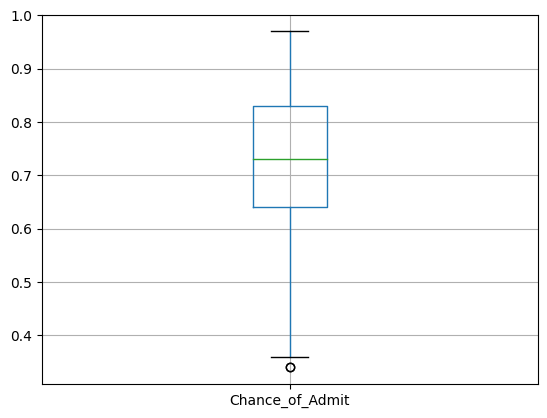

In [70]:
dfAdmissionPredict.boxplot(column = ['Chance_of_Admit'])
#boxplot for the target variable

The circle shows the presence of outliers in the data column Chance of Admit

<AxesSubplot: >

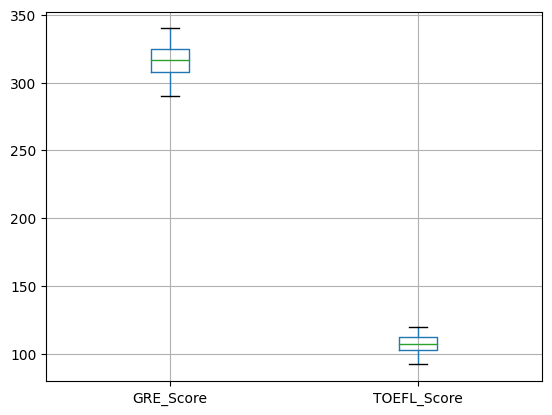

In [71]:
dfAdmissionPredict.boxplot(['GRE_Score' , 'TOEFL_Score'])
#boxplot for GRE_Score and TOEFL_Score

There are no outliers in the data columns GRE Score, TOEFL Score.

<AxesSubplot: >

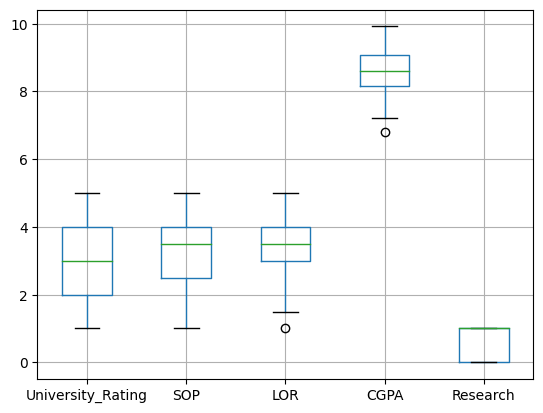

In [73]:
dfAdmissionPredict.boxplot(['University_Rating' , 'SOP' , 'LOR' , 'CGPA', 'Research'])

There are outliers in the data columns CGPA, LOR. 